Import du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
data = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 
  
# metadata 
print(data.metadata) 
  
# variable information 
print(data.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [3]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NObeyesdad  2111 non-null   object
dtypes: object(1)
memory usage: 16.6+ KB


In [7]:
y.value_counts(normalize=True)*100

NObeyesdad         
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']].columns:
    #print(column)
    X[column] = le.fit_transform(X[column])

C:\Users\hp\AppData\Local\Temp\ipykernel_19404\3913380901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_19404\3913380901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_19404\3913380901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [9]:
X = X.rename(columns={'Gender': 'Gender',
                       'Age': 'Age',
                       'Height': 'Height',
                       'Weight': 'Weight',
                       'family_history_with_overweight': 'family_history_with_overweight',
                       'FAVC': 'high_caloric_food',
                       'FCVC': 'vegetables_meals',
                       'NCP': 'main_meals_daily',
                       'CAEC': 'eat_btw_meals',
                       'SMOKE': 'SMOKE',
                       'CH2O': 'CH2O',
                       'SCC': 'monitor_calories',
                       'FAF': 'physical_activity',
                       'TUE': 'tech_time',
                       'CALC': 'alcohol_frequency',
                       'MTRANS': 'MTRANS'})

In [10]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,high_caloric_food,vegetables_meals,main_meals_daily,eat_btw_meals,SMOKE,CH2O,monitor_calories,physical_activity,tech_time,alcohol_frequency,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [11]:
dataset = X
dataset['Obesity_level'] = y
dataset['Obesity_level'] = dataset['Obesity_level'].map(
    {
        'Obesity_Type_I': 0,
        'Obesity_Type_III':1,
        'Obesity_Type_II':2,
        'Overweight_Level_I':3,
        'Overweight_Level_II':4,
        'Normal_Weight':5,
        'Insufficient_Weight':6
        
    }
)

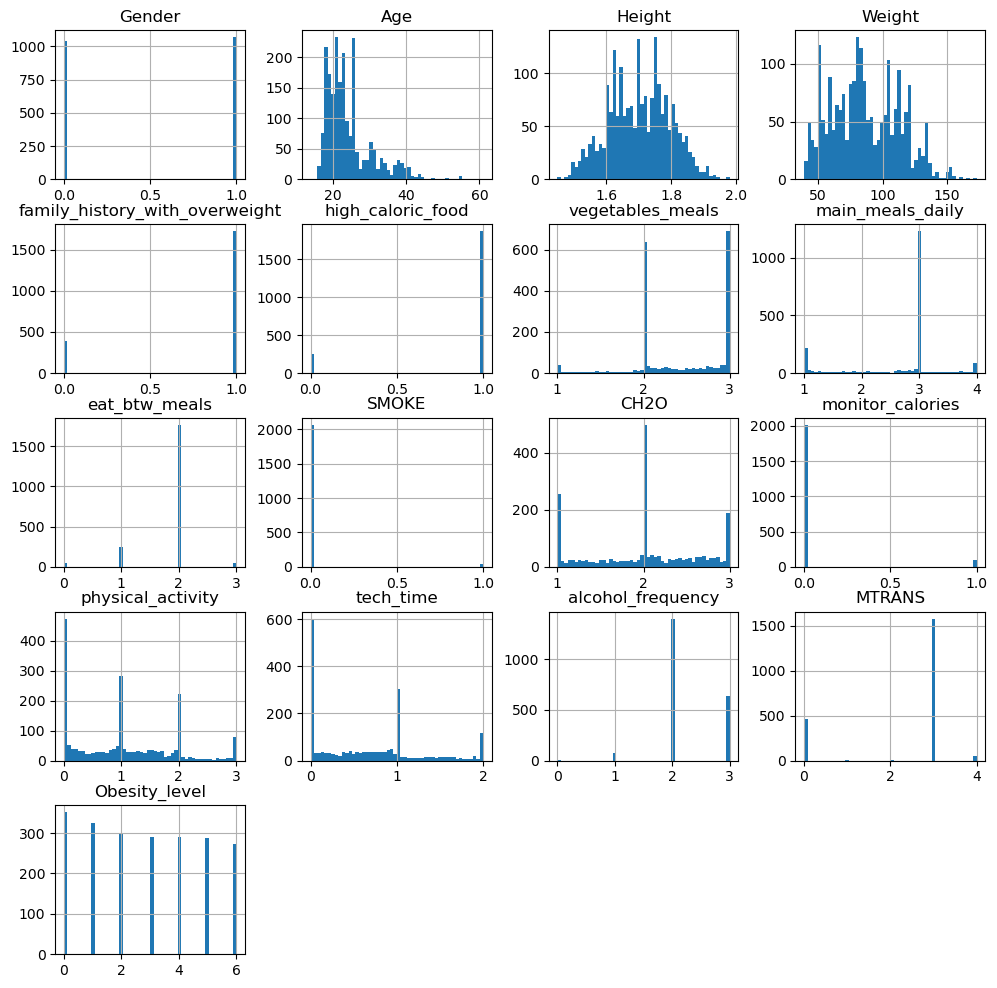

In [12]:
#Affichage des graphiques
dataset.hist(bins=50, figsize=(12, 12))
plt.show()


In [13]:
dataset['Obesity_level'].value_counts()

Obesity_level
0    351
1    324
2    297
3    290
4    290
5    287
6    272
Name: count, dtype: int64

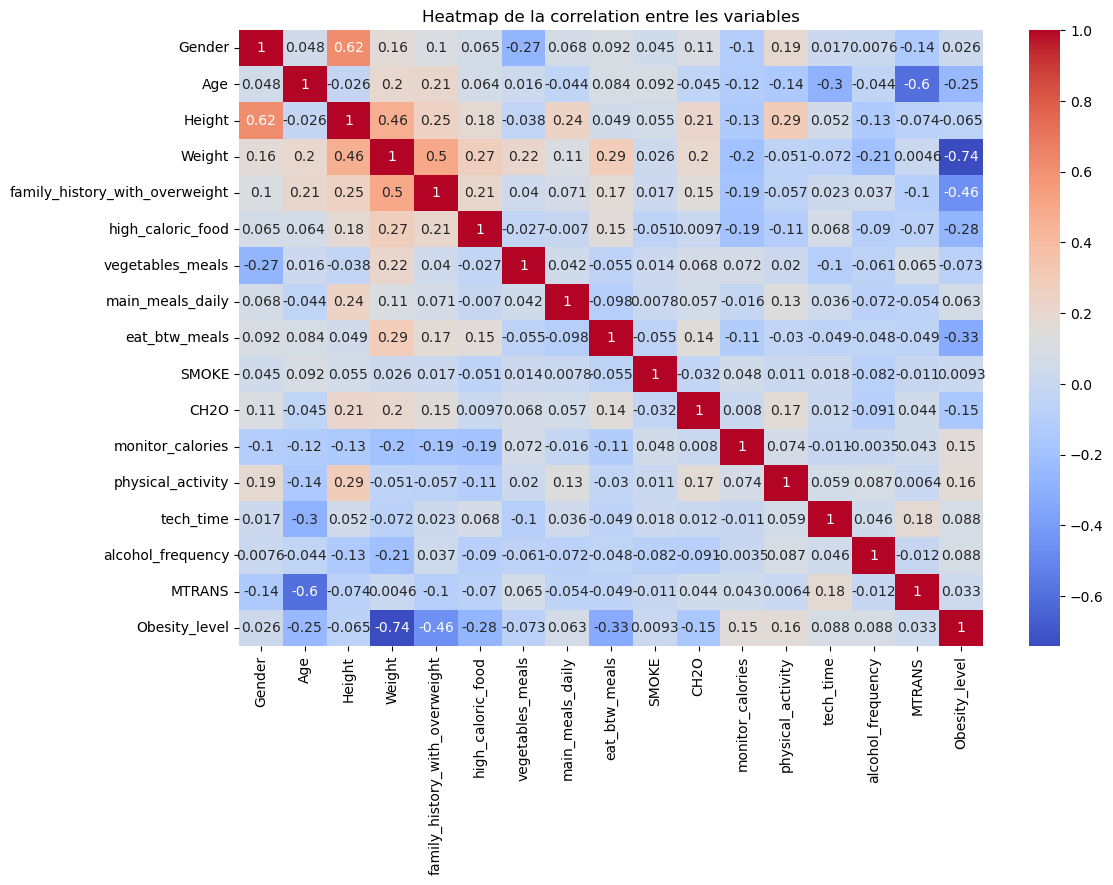

In [14]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de la correlation entre les variables')
plt.show()

Création des ensembles de test et d'entrainement

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Obesity_level', axis=1), dataset['Obesity_level'], test_size=0.2, stratify=y, random_state=42)

Sélection du modèle: Notre objectif étant de prédire le type d'obésité d'une personne, il s'agit alors d'un problème de classification. Nous allons choisir entre trois modèles de classification: Random forest, SVM et KNN

Arbre de décision

In [16]:
# instanciation de l'arbre
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [17]:
# dictionnaire des hyperparamètres
search_space = {
    'criterion':['gini','entropy','log_loss']
}

# Initialisation de GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid = search_space, cv=5, scoring = "accuracy", verbose = 4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................criterion=gini;, score=0.908 total time=   0.0s
[CV 2/5] END ....................criterion=gini;, score=0.932 total time=   0.0s
[CV 3/5] END ....................criterion=gini;, score=0.935 total time=   0.0s
[CV 4/5] END ....................criterion=gini;, score=0.979 total time=   0.0s
[CV 5/5] END ....................criterion=gini;, score=0.914 total time=   0.0s
[CV 1/5] END .................criterion=entropy;, score=0.947 total time=   0.0s
[CV 2/5] END .................criterion=entropy;, score=0.935 total time=   0.0s
[CV 3/5] END .................criterion=entropy;, score=0.962 total time=   0.0s
[CV 4/5] END .................criterion=entropy;, score=0.953 total time=   0.0s
[CV 5/5] END .................criterion=entropy;, score=0.932 total time=   0.0s
[CV 1/5] END ................criterion=log_loss;, score=0.941 total time=   0.0s
[CV 2/5] END ................criterion=log_loss;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy', verbose=4)

In [18]:
print(grid_search.best_estimator_) # pour avoir les détail du meilleur modèle


DecisionTreeClassifier(criterion='log_loss')


In [27]:
best_tree = DecisionTreeClassifier(criterion='log_loss',max_depth=7)
best_tree.fit(X_train,y_train)
best_tree.score(X_test, y_test)

0.9361702127659575

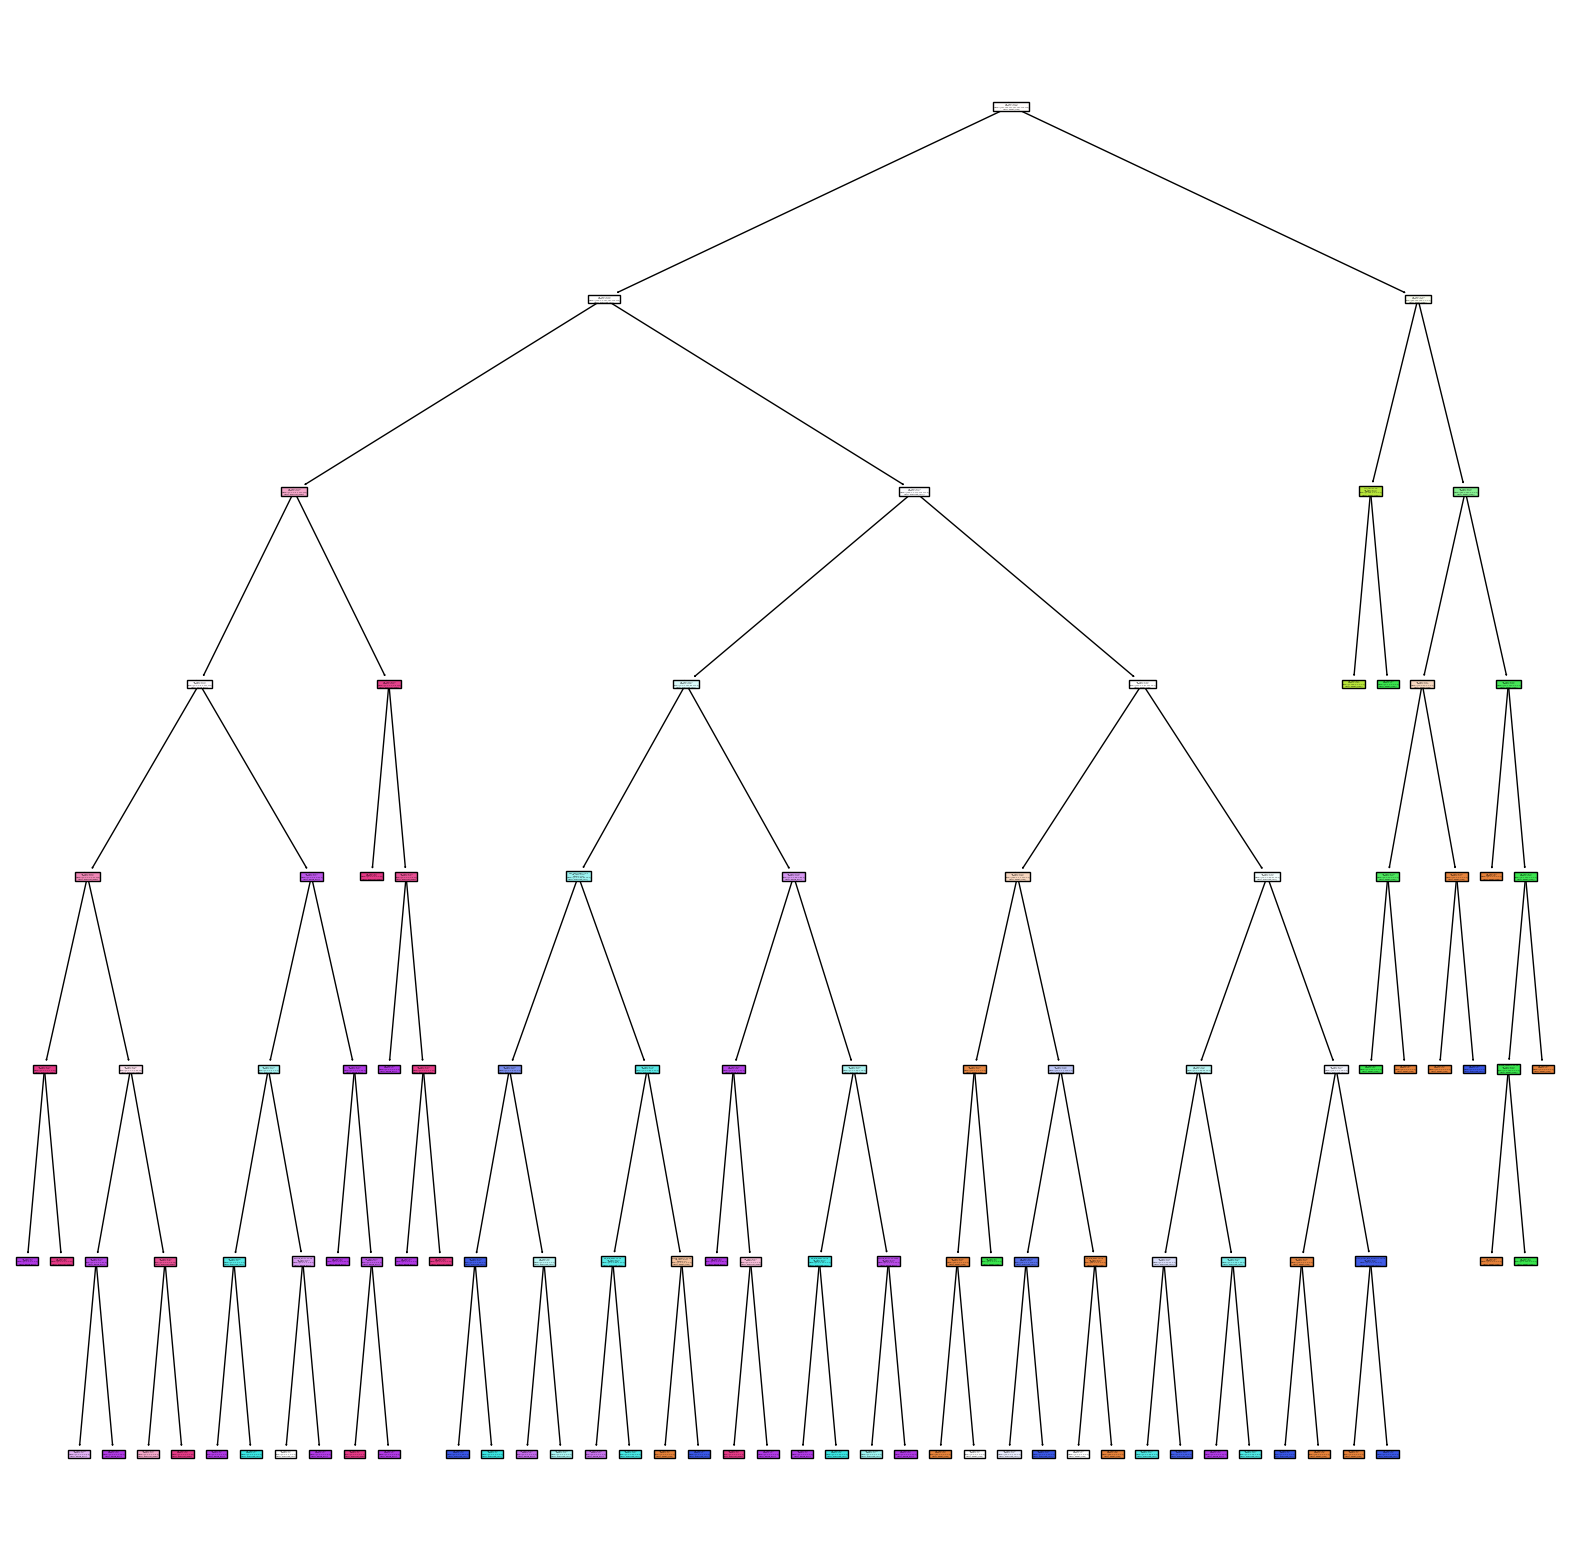

In [28]:
from sklearn.tree import plot_tree
#noms_caracteristiques = ["longueur_sepale", "largeur_sepale", "longueur_petale", "largeur_petale"]
noms_classes = ["Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II",
                "Overweight_Level_I","Overweight_Level_II","Normal_Weight","Insufficient_Weight"]
plt.figure(figsize=(20,20))
plot_tree(best_tree, feature_names= list(dataset.columns[:-1]),  filled=True,class_names=noms_classes)
plt.show()

In [21]:
names = y.value_counts().index.tolist()
type(names)
type(names[0][0])

str

Méthodes ensemblistes: Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap=True)
# dictionnaire des hyperparamètres
search_space_rf = {
    'criterion':['gini','entropy','log_loss'],
    'n_estimators':[10,50,70,100,150,200]
}

# Initialisation de GridSearchCV
grid_search_rf = GridSearchCV(estimator= rf_clf, param_grid = search_space_rf, cv=5, scoring = "accuracy", verbose = 4)
grid_search_rf.fit(X_train, y_train)
print(grid_search.best_estimator_) # pour avoir les détails du meilleur modèle

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.893 total time=   0.0s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.917 total time=   0.0s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.929 total time=   0.0s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.908 total time=   0.0s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.932 total time=   0.0s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.947 total time=   0.0s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.956 total time=   0.0s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.964 total time=   0.0s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.964 total time=   0.0s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.947 total time=   0.0s
[CV 1/5] END ...criterion=gini, n_estimators=70;, score=0.923 total time=   0.2s
[CV 2/5] END ...criterion=gini, n_estimators=70;

In [23]:
print(grid_search.best_params_,grid_search.best_score_) # pour avoir les détail du meilleur modèle


{'criterion': 'log_loss'} 0.9454971643284814


In [24]:
best_rf_clf = RandomForestClassifier(criterion='log_loss', bootstrap=True, n_estimators=100)
best_rf_clf.fit(X_train,y_train)
best_rf_clf.score(X_test, y_test)

0.9550827423167849

Naïve bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [60]:
# Initialiser le modèle Naïve Bayes
gnb = GaussianNB()

# Entraîner le modèle
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
gnb.score(X_test, y_test)

0.6028368794326241